# The economic schools of thought from 1800 to the present day on DBpedia

In [43]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter

In [44]:
query = """

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?economist ?name ?school ?schoolTradition

WHERE { ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbp:almaMater ?school .
        ?economist owl:sameAs ?sameAs .
        ?economist dbp:schoolTradition ?sT .

  BIND(STRAFTER(STR(?sT),"http://dbpedia.org/resource/") AS ?sT_)
  BIND(REPLACE(STR(?sT_),"[_]"," ") AS ?schoolTradition)

  FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  FILTER (str(?schoolTradition) != "")
}
"""

In [45]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [46]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [47]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [48]:
### Analyse of the result

In [49]:
# Number of rows in the result
len(rc['results']['bindings'])

581

In [50]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Pasinetti'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Pasinetti'}, 'school': {'type': 'literal', 'xml:lang': 'en', 'value': 'Università Cattolica Milano, University of Cambridge.'}, 'schoolTradition': {'type': 'literal', 'value': 'Post-Keynesian economics'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Léon_Walras'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Léon Walras'}, 'school': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Mines_ParisTech'}, 'schoolTradition': {'type': 'literal', 'value': 'Marginalism'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Léon_Walras'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Léon Walras'}, 'school': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Mines_ParisTech'}, 'schoolTradition': {'type': 'literal', 'value': 'Lausanne School'}}
{'economist': {'type': 'uri', 'value': '

In [51]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['school']['value'],l['schoolTradition']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['school']['value'],l['schoolTradition']['value']])
            except :
                print([l['economist']['value'],'',l['school']['value'],l['schoolTradition']['value']])

        i += 1

['http://dbpedia.org/resource/Luigi_Pasinetti', 'Luigi Pasinetti', 'Università Cattolica Milano, University of Cambridge.', 'Post-Keynesian economics']
['http://dbpedia.org/resource/Léon_Walras', 'Léon Walras', 'http://dbpedia.org/resource/Mines_ParisTech', 'Marginalism']
['http://dbpedia.org/resource/Léon_Walras', 'Léon Walras', 'http://dbpedia.org/resource/Mines_ParisTech', 'Lausanne School']
['http://dbpedia.org/resource/Maitreesh_Ghatak', 'Maitreesh Ghatak', 'http://dbpedia.org/resource/University_of_Calcutta', 'Development economics']
['http://dbpedia.org/resource/Maitreesh_Ghatak', 'Maitreesh Ghatak', 'http://dbpedia.org/resource/Delhi_University', 'Development economics']


In [52]:
# Explore
schoolTraditionList = []
for l in rc['results']['bindings']:
    schoolTraditionList.append(l['schoolTradition']['value'])

In [53]:
counterSchoolTraditionList = Counter(schoolTraditionList)
groupedSchoolTraditionList = sorted(list(zip(counterSchoolTraditionList.values(), counterSchoolTraditionList.keys())), reverse=True)

## The headcount of economists per school of thought from 1800 to the present day (by descrising order)

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


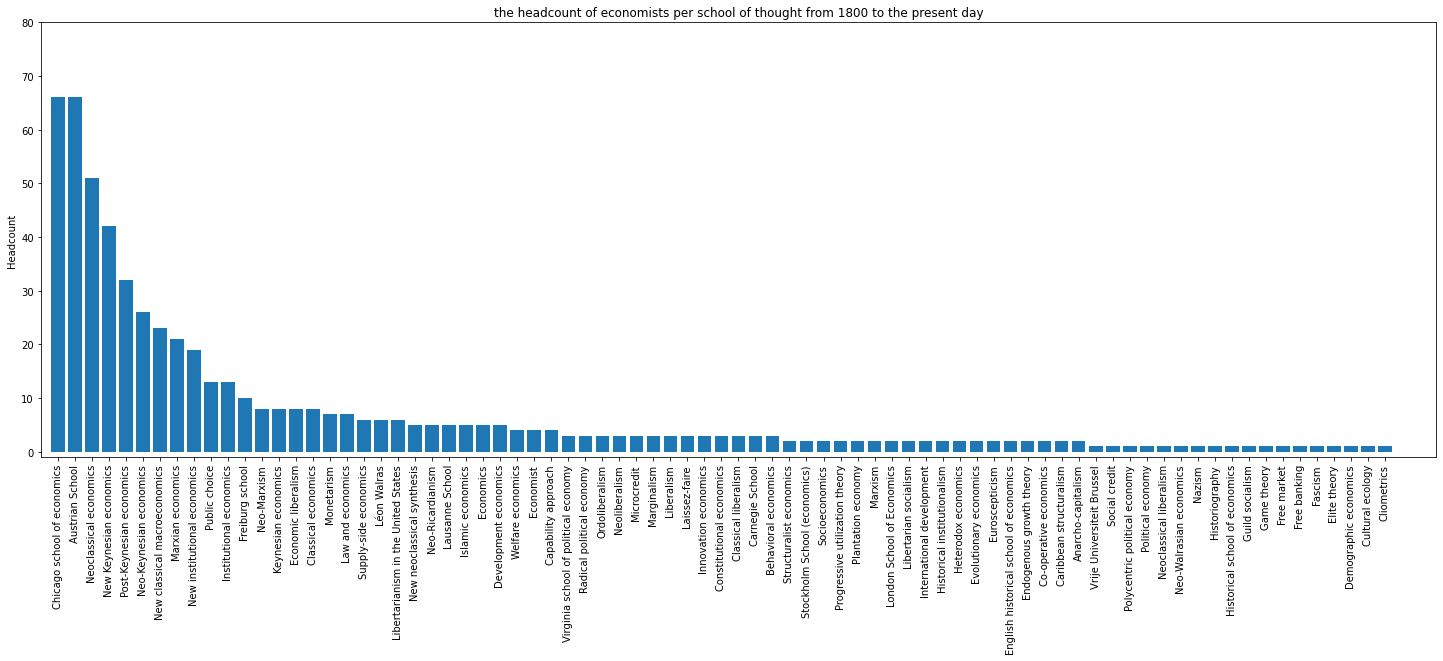

In [54]:
# Barplot of the headcount of economists per school of thought from 1800 to the present day
eff = [l[1] for l in groupedSchoolTraditionList]
objects = [l[0] for l in groupedSchoolTraditionList]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.title('the headcount of economists per school of thought from 1800 to the present day')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,81)
ax.set_ylim(-1,80)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [32]:
bGSTL=groupedSchoolTraditionList[:30]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


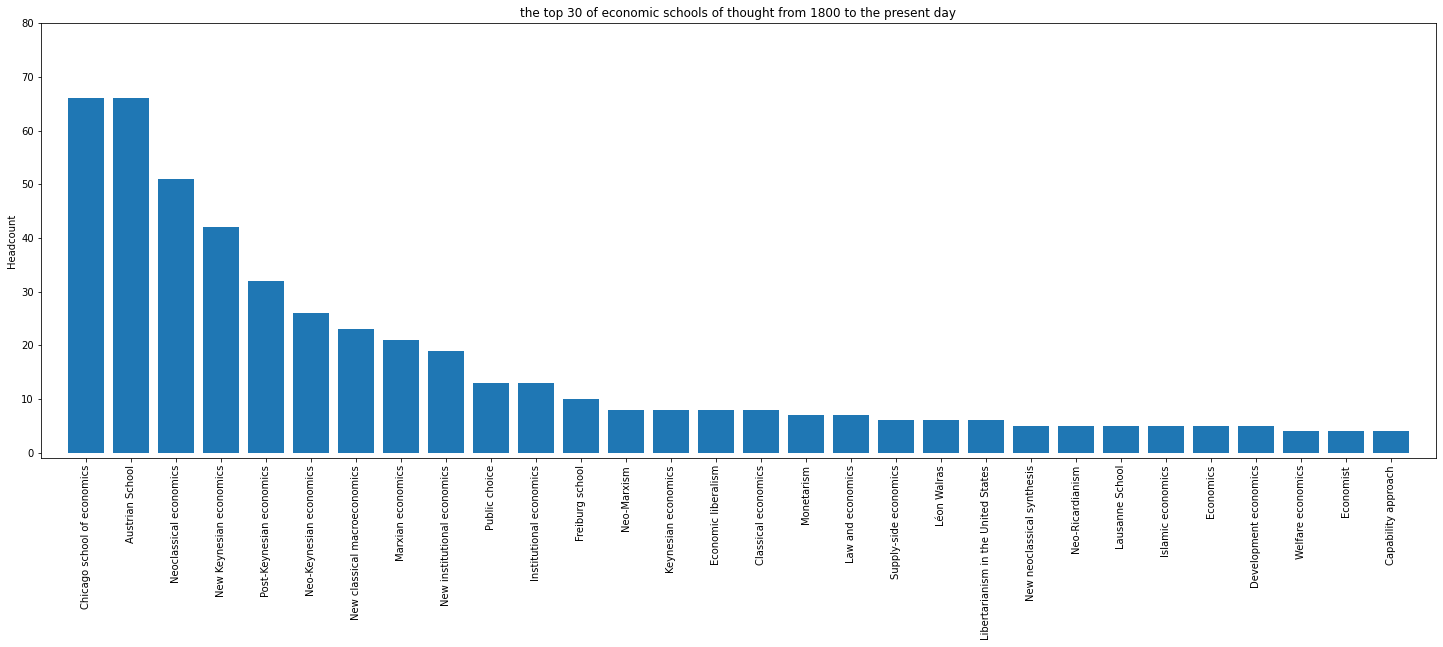

In [33]:
# Barplot of the top 30 of economic schools of thought from 1800 to the present day
eff1 = [l[1] for l in bGSTL]
objects1 = [l[0] for l in bGSTL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.title('the top 30 of economic schools of thought from 1800 to the present day')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(-1,80)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()